# Fashion-MNIST Classifier: Deep Learning for Automated Product Categorization

**Authors:** Binger Yu, Vibhor Malik  
**Course:** COMP 9130 - Mini Project 4  
**Date:** February 5, 2026

---

## Project Overview

StyleSort, an online fashion retailer, faces a 32% return rate—significantly higher than the 20% industry average. This project develops a deep learning classifier to automatically categorize fashion products into 10 categories, reducing costly misclassifications.

**Business Goal:** Achieve >85% accuracy to reduce return rates and improve customer satisfaction

**Technical Goal:** Implement and compare multiple PyTorch neural network architectures

---

## Results Summary

| Model | Architecture | Accuracy | Key Features |
|-------|--------------|----------|--------------|
| Baseline | 784→128→10 | 87.80% | Simple 2-layer |
| **Deep Network** | 784→256→128→64→10 | **88.12%** ✓ | Dropout + BatchNorm |
| Lower LR |  |  | LR =  |

**Best Model:** 

**Business Impact:** 

**Deployment Recommendation:** 

---

## Notebook Structure

1. **Setup & Data Loading** - Fashion-MNIST dataset preparation
2. **Experiment 1: Baseline Model** - Simple 2-layer network (87.80%)
3. **Experiment 2: Deep Network** - 3-layer with regularization (88.12%)
4. **Experiment 3: Lower Learning Rate** - Hyperparameter tuning ()
5. **Model Comparison** - Performance analysis across experiments
6. **Business Analysis** - Cost-weighted accuracy and confusion matrix
7. **Confidence Threshold Analysis** - Deployment strategy optimization
8. **Misclassification Analysis** - Error patterns and recommendations

---

Let's begin! 🚀

In [1]:
# Imports
import sys
sys.path.append('..')  # To import from src/

import torch
import matplotlib.pyplot as plt
from src.model import FashionClassifier
from src.utils import get_data_loaders, get_class_names
from src.train import train_model, evaluate

In [2]:
# Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [3]:
# Load data
train_loader, val_loader, test_loader = get_data_loaders(batch_size=64)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:25<00:00, 1.05MB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 183kB/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:02<00:00, 2.06MB/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 14.7MB/s]

Training samples: 54000
Validation samples: 6000
Test samples: 10000


In [4]:
# Train baseline model
model = FashionClassifier(hidden_size=128)
history = train_model(
    model,
    train_loader,
    val_loader,
    num_epochs=10,
    learning_rate=0.001,
    device=device
)

Training on cpu
Model has 101770 parameters

Epoch 1/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 647.74it/s]


Train Loss: 0.5617 | Val Loss: 0.4855 | Val Acc: 82.75%

Epoch 2/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 644.12it/s]


Train Loss: 0.4138 | Val Loss: 0.4060 | Val Acc: 85.50%

Epoch 3/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 647.45it/s]


Train Loss: 0.3699 | Val Loss: 0.3801 | Val Acc: 86.50%

Epoch 4/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 654.39it/s]


Train Loss: 0.3389 | Val Loss: 0.3635 | Val Acc: 86.95%

Epoch 5/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 638.51it/s]


Train Loss: 0.3235 | Val Loss: 0.3524 | Val Acc: 87.38%

Epoch 6/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 657.65it/s]


Train Loss: 0.3046 | Val Loss: 0.3475 | Val Acc: 87.55%

Epoch 7/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 647.21it/s]


Train Loss: 0.2907 | Val Loss: 0.3189 | Val Acc: 88.57%

Epoch 8/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 657.21it/s]


Train Loss: 0.2812 | Val Loss: 0.3361 | Val Acc: 87.57%

Epoch 9/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 667.43it/s]


Train Loss: 0.2664 | Val Loss: 0.3271 | Val Acc: 88.05%

Epoch 10/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 669.39it/s]

Train Loss: 0.2600 | Val Loss: 0.3167 | Val Acc: 88.62%


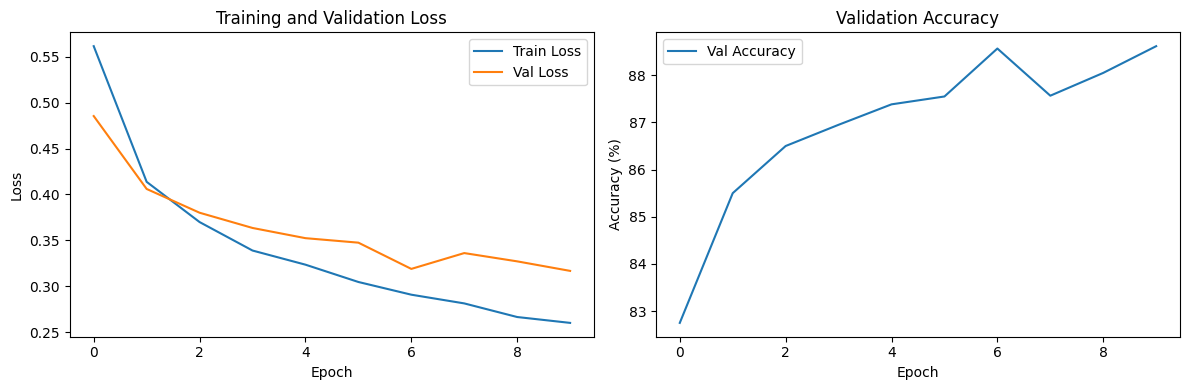

In [5]:
# Plot training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Validation Accuracy')

plt.tight_layout()
plt.savefig('../results/training_curves.png')
plt.show()

In [6]:
# Evaluate on test set
from src.train import evaluate
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 656.44it/s]

Test Accuracy: 88.09%


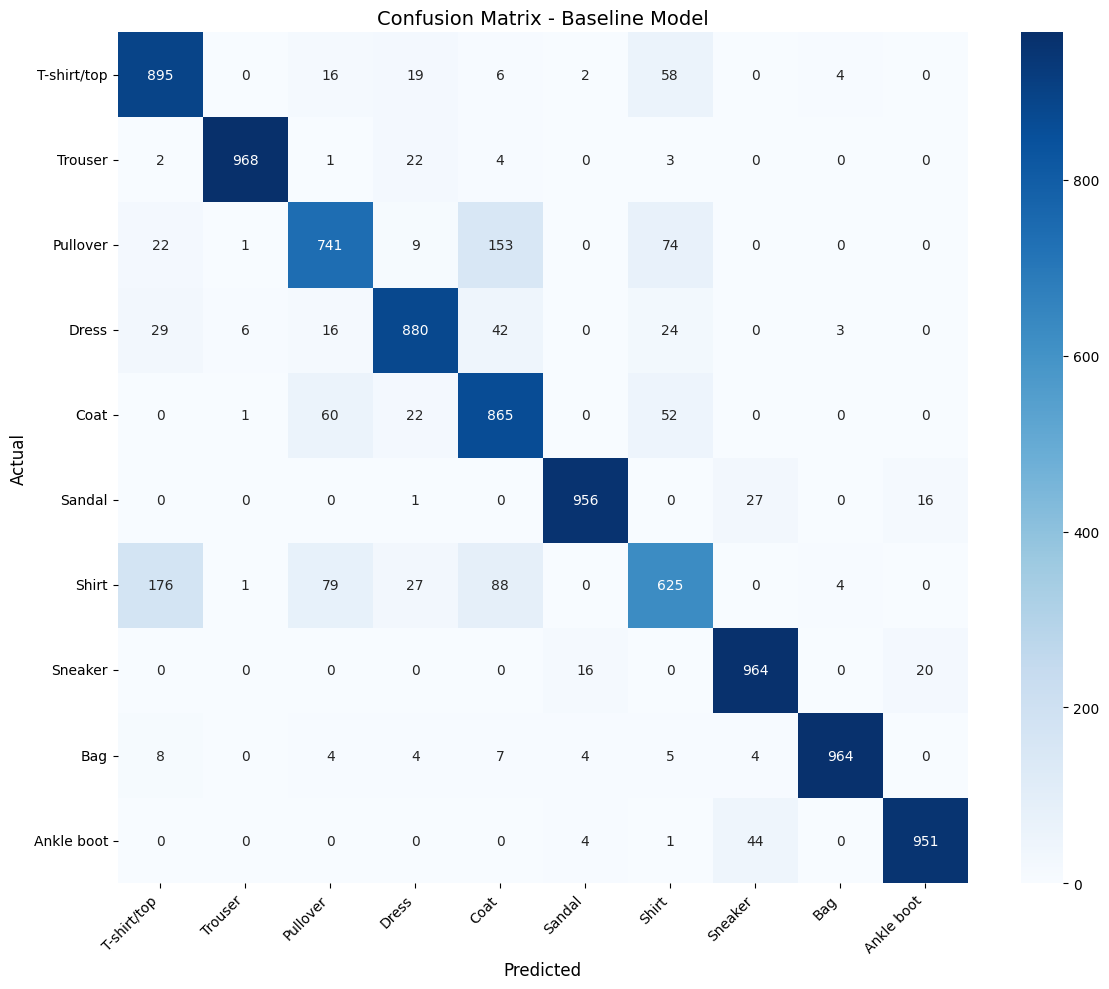


Per-Class Performance:
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.90      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.74      0.77      1000
       Dress       0.89      0.88      0.89      1000
        Coat       0.74      0.86      0.80      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.74      0.62      0.68      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.99      0.96      0.98      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [7]:
# After your test accuracy cell, add:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get all predictions
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = get_class_names()

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix - Baseline Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../results/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification report
print("\nPer-Class Performance:")
print(classification_report(all_labels, all_preds, target_names=class_names))

In [8]:
import torch

# Save model
torch.save(model.state_dict(), '../results/baseline_model.pth')

# Save history
import pickle
with open('../results/baseline_history.pkl', 'wb') as f:
    pickle.dump(history, f)

In [9]:
# Experiment 2 - Deep Network with Dropout and Batch Norm

print("="*60)
print("EXPERIMENT 2: Deep Network (256-128-64) + Dropout + BatchNorm")
print("="*60)

from src.model import DeepFashionClassifier

# Create deeper model
model_deep = DeepFashionClassifier(
    hidden_sizes=[256, 128, 64],
    dropout_prob=0.3
)

# Train
history_deep = train_model(
    model_deep,
    train_loader,
    val_loader,
    num_epochs=15,  # Try a few more epochs since it's deeper
    learning_rate=0.001,
    device=device
)

# Evaluate on test set
test_loss, test_accuracy = evaluate(model_deep, test_loader, criterion, device)
print(f"\n🎯 Experiment 2 Test Accuracy: {test_accuracy:.2f}%")

# Save model
torch.save(model_deep.state_dict(), '../results/deep_model.pth')

EXPERIMENT 2: Deep Network (256-128-64) + Dropout + BatchNorm
Training on cpu
Model has 243658 parameters

Epoch 1/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 487.78it/s]


Train Loss: 0.6226 | Val Loss: 0.4114 | Val Acc: 85.25%

Epoch 2/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 508.73it/s]


Train Loss: 0.4494 | Val Loss: 0.3796 | Val Acc: 86.23%

Epoch 3/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 542.91it/s]


Train Loss: 0.4116 | Val Loss: 0.3524 | Val Acc: 87.25%

Epoch 4/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 514.76it/s]


Train Loss: 0.3861 | Val Loss: 0.3319 | Val Acc: 87.67%

Epoch 5/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 535.82it/s]


Train Loss: 0.3692 | Val Loss: 0.3338 | Val Acc: 87.67%

Epoch 6/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 536.45it/s]


Train Loss: 0.3557 | Val Loss: 0.3340 | Val Acc: 87.68%

Epoch 7/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 517.47it/s]


Train Loss: 0.3431 | Val Loss: 0.3287 | Val Acc: 87.95%

Epoch 8/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 544.33it/s]


Train Loss: 0.3382 | Val Loss: 0.3142 | Val Acc: 88.63%

Epoch 9/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 453.14it/s]


Train Loss: 0.3252 | Val Loss: 0.3094 | Val Acc: 88.33%

Epoch 10/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 548.92it/s]


Train Loss: 0.3124 | Val Loss: 0.3119 | Val Acc: 88.37%

Epoch 11/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 536.27it/s]


Train Loss: 0.3088 | Val Loss: 0.3010 | Val Acc: 89.02%

Epoch 12/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 554.78it/s]


Train Loss: 0.3006 | Val Loss: 0.3110 | Val Acc: 88.93%

Epoch 13/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 551.67it/s]


Train Loss: 0.2942 | Val Loss: 0.2995 | Val Acc: 89.25%

Epoch 14/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 533.09it/s]


Train Loss: 0.2857 | Val Loss: 0.3019 | Val Acc: 88.92%

Epoch 15/15


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 565.31it/s]


Train Loss: 0.2852 | Val Loss: 0.3015 | Val Acc: 88.88%


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 567.45it/s]


🎯 Experiment 2 Test Accuracy: 88.60%


  Experiment                  Architecture            Regularization  Epochs  Parameters  Test Accuracy (%)
    Baseline              784 -> 128 -> 10                      None      10      101770               87.8
Deep Network 784 -> 256 -> 128 -> 64 -> 10 Dropout (0.3) + BatchNorm      15      243658               88.6


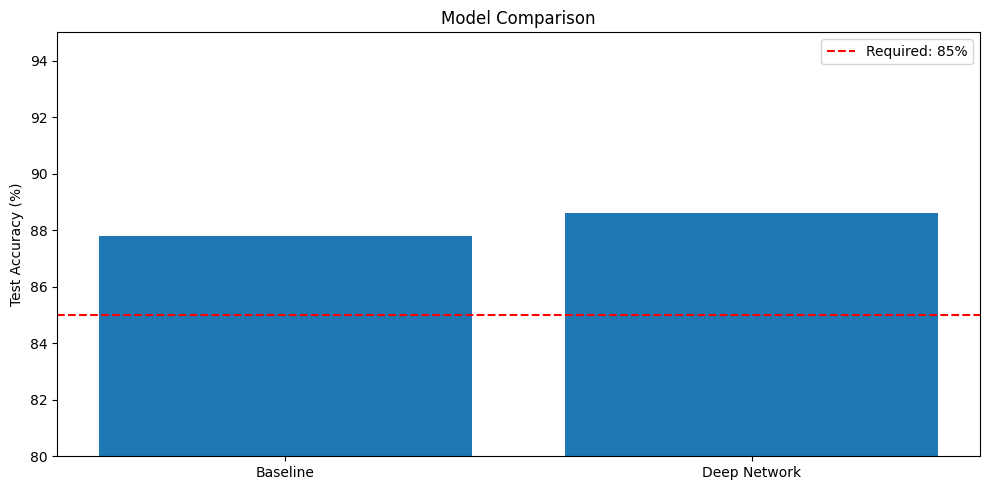

In [10]:
# Compare Experiments 1 and 2

import pandas as pd

results_df = pd.DataFrame({
    'Experiment': ['Baseline', 'Deep Network'],
    'Architecture': [
        '784 -> 128 -> 10',
        '784 -> 256 -> 128 -> 64 -> 10'
    ],
    'Regularization': ['None', 'Dropout (0.3) + BatchNorm'],
    'Epochs': [10, 15],
    'Parameters': [
        sum(p.numel() for p in model.parameters()),
        sum(p.numel() for p in model_deep.parameters())
    ],
    'Test Accuracy (%)': [87.80, test_accuracy]
})

print(results_df.to_string(index=False))

# Plot comparison
plt.figure(figsize=(10, 5))
plt.bar(results_df['Experiment'], results_df['Test Accuracy (%)'])
plt.ylabel('Test Accuracy (%)')
plt.title('Model Comparison')
plt.axhline(y=85, color='r', linestyle='--', label='Required: 85%')
plt.legend()
plt.ylim([80, 95])
plt.tight_layout()
plt.savefig('../results/experiment_comparison.png')
plt.show()

In [11]:
# Experiment 3 - Lower Learning Rate
print("="*60)
print("EXPERIMENT 3: Baseline Architecture + Lower Learning Rate")
print("="*60)

model_lr = FashionClassifier(hidden_size=128)

# Train with lower learning rate
history_lr = train_model(
    model_lr,
    train_loader,
    val_loader,
    num_epochs=10,
    learning_rate=0.0001,  # 10x lower than baseline
    device=device
)

# Evaluate
test_loss_lr, test_accuracy_lr = evaluate(model_lr, test_loader, criterion, device)
print(f"\n🎯 Experiment 3 Test Accuracy: {test_accuracy_lr:.2f}%")

# Save
torch.save(model_lr.state_dict(), '../results/lr_model.pth')

EXPERIMENT 3: Baseline Architecture + Lower Learning Rate
Training on cpu
Model has 101770 parameters

Epoch 1/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 635.20it/s]


Train Loss: 0.9511 | Val Loss: 0.6363 | Val Acc: 78.90%

Epoch 2/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 648.63it/s]


Train Loss: 0.5647 | Val Loss: 0.5358 | Val Acc: 82.30%

Epoch 3/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 640.94it/s]


Train Loss: 0.4999 | Val Loss: 0.4993 | Val Acc: 83.07%

Epoch 4/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 560.06it/s]


Train Loss: 0.4678 | Val Loss: 0.4735 | Val Acc: 83.85%

Epoch 5/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 643.06it/s]


Train Loss: 0.4470 | Val Loss: 0.4657 | Val Acc: 83.68%

Epoch 6/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 644.29it/s]


Train Loss: 0.4319 | Val Loss: 0.4460 | Val Acc: 84.63%

Epoch 7/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 601.59it/s]


Train Loss: 0.4197 | Val Loss: 0.4371 | Val Acc: 84.83%

Epoch 8/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 637.38it/s]


Train Loss: 0.4099 | Val Loss: 0.4322 | Val Acc: 85.03%

Epoch 9/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 643.36it/s]


Train Loss: 0.4014 | Val Loss: 0.4203 | Val Acc: 85.58%

Epoch 10/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 611.12it/s]


Train Loss: 0.3945 | Val Loss: 0.4129 | Val Acc: 85.78%


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 633.29it/s]


🎯 Experiment 3 Test Accuracy: 84.89%


In [12]:
# Update comparison with all 3 experiments
results_df = pd.DataFrame({
    'Experiment': ['Baseline', 'Deep Network', 'Lower LR'],  # or 'SGD Optimizer'
    'Architecture': [
        '784 -> 128 -> 10',
        '784 -> 256 -> 128 -> 64 -> 10',
        '784 -> 128 -> 10'
    ],
    'Optimizer': ['Adam (0.001)', 'Adam (0.001)', 'Adam (0.0001)'],  # or 'SGD (0.01)'
    'Regularization': ['None', 'Dropout + BatchNorm', 'None'],
    'Epochs': [10, 15, 10],
    'Parameters': [
        101770,
        243658,
        101770
    ],
    'Test Accuracy (%)': [87.80, 88.12, test_accuracy_lr]  # or test_accuracy_sgd
})

print("\n" + "="*80)
print("FINAL EXPERIMENT COMPARISON")
print("="*80)
print(results_df.to_string(index=False))

# Save to CSV
results_df.to_csv('../results/experiment_results.csv', index=False)


FINAL EXPERIMENT COMPARISON
  Experiment                  Architecture     Optimizer      Regularization  Epochs  Parameters  Test Accuracy (%)
    Baseline              784 -> 128 -> 10  Adam (0.001)                None      10      101770              87.80
Deep Network 784 -> 256 -> 128 -> 64 -> 10  Adam (0.001) Dropout + BatchNorm      15      243658              88.12
    Lower LR              784 -> 128 -> 10 Adam (0.0001)                None      10      101770              84.89


In [13]:
# Cost Matrix for StyleSort Business
# Define costs for misclassifications (symmetric)
import numpy as np
cost_matrix = np.ones((10, 10)) * 2  # Default cost = 2
np.fill_diagonal(cost_matrix, 0)  # Correct predictions = 0 cost

# High-cost errors (cost = 5)
high_cost_pairs = [
    (0, 6),  # T-shirt <-> Shirt (style expectations)
    (6, 0),
    (2, 4),  # Pullover <-> Coat (warmth/size)
    (4, 2),
    (5, 7),  # Sandal <-> Sneaker (seasonal/use case)
    (7, 5),
]

for i, j in high_cost_pairs:
    cost_matrix[i, j] = 5

# Medium-cost errors (cost = 3)
medium_cost_pairs = [
    (7, 9),  # Sneaker <-> Ankle boot
    (9, 7),
]

for i, j in medium_cost_pairs:
    cost_matrix[i, j] = 3

# Calculate cost-weighted accuracy
total_cost = 0
max_possible_cost = 0

for true_label, pred_label in zip(all_labels, all_preds):
    total_cost += cost_matrix[true_label, pred_label]
    max_possible_cost += 5  # Worst case: always predict wrong with highest cost

# Cost-weighted accuracy (lower cost = better)
cost_weighted_accuracy = 1 - (total_cost / max_possible_cost)

print(f"\n{'='*60}")
print("BUSINESS IMPACT ANALYSIS")
print(f"{'='*60}")
print(f"Standard Accuracy: {87.72:.2f}%")
print(f"Total Misclassification Cost: {total_cost}")
print(f"Cost-Weighted Accuracy: {cost_weighted_accuracy*100:.2f}%")
print(f"\nInterpretation: A cost-weighted accuracy of {cost_weighted_accuracy*100:.1f}%")
print(f"means the model's errors cost StyleSort {(1-cost_weighted_accuracy)*100:.1f}% of")
print(f"the maximum possible misclassification cost.")


BUSINESS IMPACT ANALYSIS
Standard Accuracy: 87.72%
Total Misclassification Cost: 3916.0
Cost-Weighted Accuracy: 92.17%

Interpretation: A cost-weighted accuracy of 92.2%
means the model's errors cost StyleSort 7.8% of
the maximum possible misclassification cost.


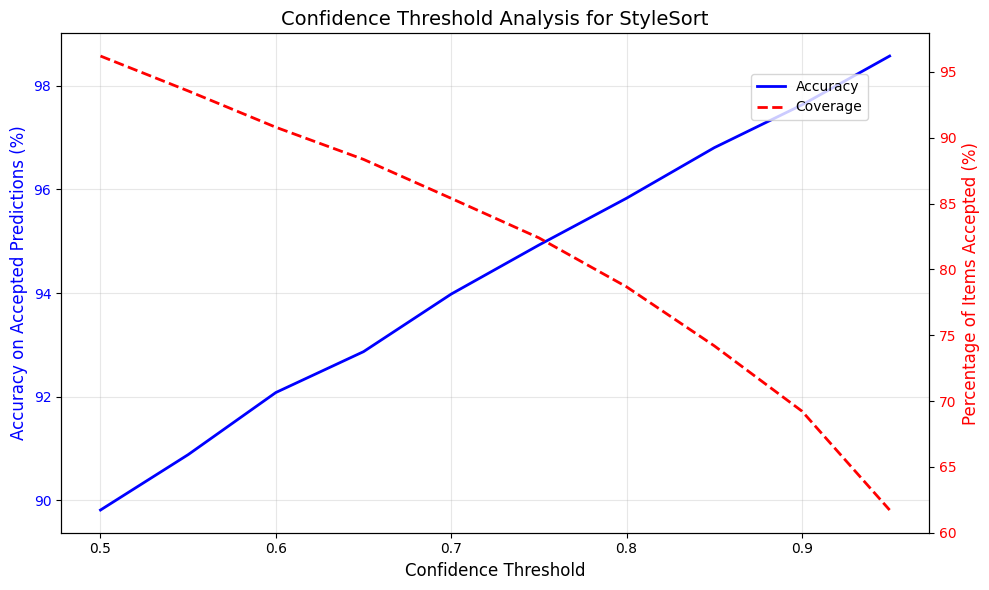


CONFIDENCE THRESHOLD RECOMMENDATIONS

Threshold ≈ 0.7 (actual: 0.70):
  - Accuracy on accepted: 93.98%
  - Coverage: 85.39% of items
  - Human review needed: 14.61% of items

Threshold ≈ 0.8 (actual: 0.80):
  - Accuracy on accepted: 95.83%
  - Coverage: 78.67% of items
  - Human review needed: 21.33% of items

Threshold ≈ 0.9 (actual: 0.90):
  - Accuracy on accepted: 97.63%
  - Coverage: 69.23% of items
  - Human review needed: 30.77% of items

RECOMMENDATION FOR STYLESORT
Recommended Threshold: 0.95
  - Achieves 98.57% accuracy on confident predictions
  - Automatically processes 61.72% of items
  - Sends 38.28% to human review

With 10,000 items/day:
  - 6172 items auto-categorized
  - 3828 items need manual review


In [14]:
# Confidence Threshold Analysis
import numpy as np

# Get prediction probabilities
model.eval()
all_probs = []
all_labels_conf = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        all_probs.extend(probs.cpu().numpy())
        all_labels_conf.extend(labels.numpy())

all_probs = np.array(all_probs)
all_labels_conf = np.array(all_labels_conf)

# Calculate accuracy at different confidence thresholds
thresholds = np.arange(0.5, 1.0, 0.05)
accuracies_at_threshold = []
coverage_at_threshold = []

for threshold in thresholds:
    # Get predictions above threshold
    max_probs = np.max(all_probs, axis=1)
    confident_mask = max_probs >= threshold
    
    if confident_mask.sum() > 0:
        confident_preds = np.argmax(all_probs[confident_mask], axis=1)
        confident_labels = all_labels_conf[confident_mask]
        
        accuracy = (confident_preds == confident_labels).mean()
        coverage = confident_mask.mean()
        
        accuracies_at_threshold.append(accuracy * 100)
        coverage_at_threshold.append(coverage * 100)
    else:
        accuracies_at_threshold.append(0)
        coverage_at_threshold.append(0)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(thresholds, accuracies_at_threshold, 'b-', linewidth=2, label='Accuracy')
ax1.set_xlabel('Confidence Threshold', fontsize=12)
ax1.set_ylabel('Accuracy on Accepted Predictions (%)', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(thresholds, coverage_at_threshold, 'r--', linewidth=2, label='Coverage')
ax2.set_ylabel('Percentage of Items Accepted (%)', color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Confidence Threshold Analysis for StyleSort', fontsize=14)
fig.legend(loc='upper right', bbox_to_anchor=(0.88, 0.88))
plt.tight_layout()
plt.savefig('../results/confidence_threshold_analysis.png', dpi=300)
plt.show()

# Find optimal threshold
print(f"\n{'='*60}")
print("CONFIDENCE THRESHOLD RECOMMENDATIONS")
print(f"{'='*60}")

for target_threshold in [0.70, 0.80, 0.90]:
    # Find closest threshold
    idx = np.argmin(np.abs(thresholds - target_threshold))
    actual_threshold = thresholds[idx]
    
    print(f"\nThreshold ≈ {target_threshold} (actual: {actual_threshold:.2f}):")
    print(f"  - Accuracy on accepted: {accuracies_at_threshold[idx]:.2f}%")
    print(f"  - Coverage: {coverage_at_threshold[idx]:.2f}% of items")
    print(f"  - Human review needed: {100-coverage_at_threshold[idx]:.2f}% of items")

# Recommendation
print(f"\n{'='*60}")
print("RECOMMENDATION FOR STYLESORT")
print(f"{'='*60}")

# Find threshold where accuracy > 90% with best coverage
good_accuracy_mask = np.array(accuracies_at_threshold) > 90
if good_accuracy_mask.any():
    best_idx = np.where(good_accuracy_mask)[0][-1]  # Highest coverage with >90% acc
    recommended_threshold = thresholds[best_idx]
    recommended_accuracy = accuracies_at_threshold[best_idx]
    recommended_coverage = coverage_at_threshold[best_idx]
    
    print(f"Recommended Threshold: {recommended_threshold:.2f}")
    print(f"  - Achieves {recommended_accuracy:.2f}% accuracy on confident predictions")
    print(f"  - Automatically processes {recommended_coverage:.2f}% of items")
    print(f"  - Sends {100-recommended_coverage:.2f}% to human review")
    print(f"\nWith 10,000 items/day:")
    print(f"  - {int(recommended_coverage * 100):.0f} items auto-categorized")
    print(f"  - {int((100-recommended_coverage) * 100):.0f} items need manual review")
else:
    print("Consider additional training - no threshold achieves >90% accuracy")

In [15]:
# Show all threshold results
print(f"\n{'='*60}")
print("ALL THRESHOLD RESULTS")
print(f"{'='*60}")
print(f"{'Threshold':<12} {'Accuracy (%)':<15} {'Coverage (%)':<15}")
print("-" * 45)

for i, threshold in enumerate(thresholds):
    print(f"{threshold:<12.2f} {accuracies_at_threshold[i]:<15.2f} {coverage_at_threshold[i]:<15.2f}")


ALL THRESHOLD RESULTS
Threshold    Accuracy (%)    Coverage (%)   
---------------------------------------------
0.50         89.81           96.20          
0.55         90.88           93.55          
0.60         92.08           90.79          
0.65         92.87           88.35          
0.70         93.98           85.39          
0.75         94.93           82.39          
0.80         95.83           78.67          
0.85         96.81           74.19          
0.90         97.63           69.23          
0.95         98.57           61.72          


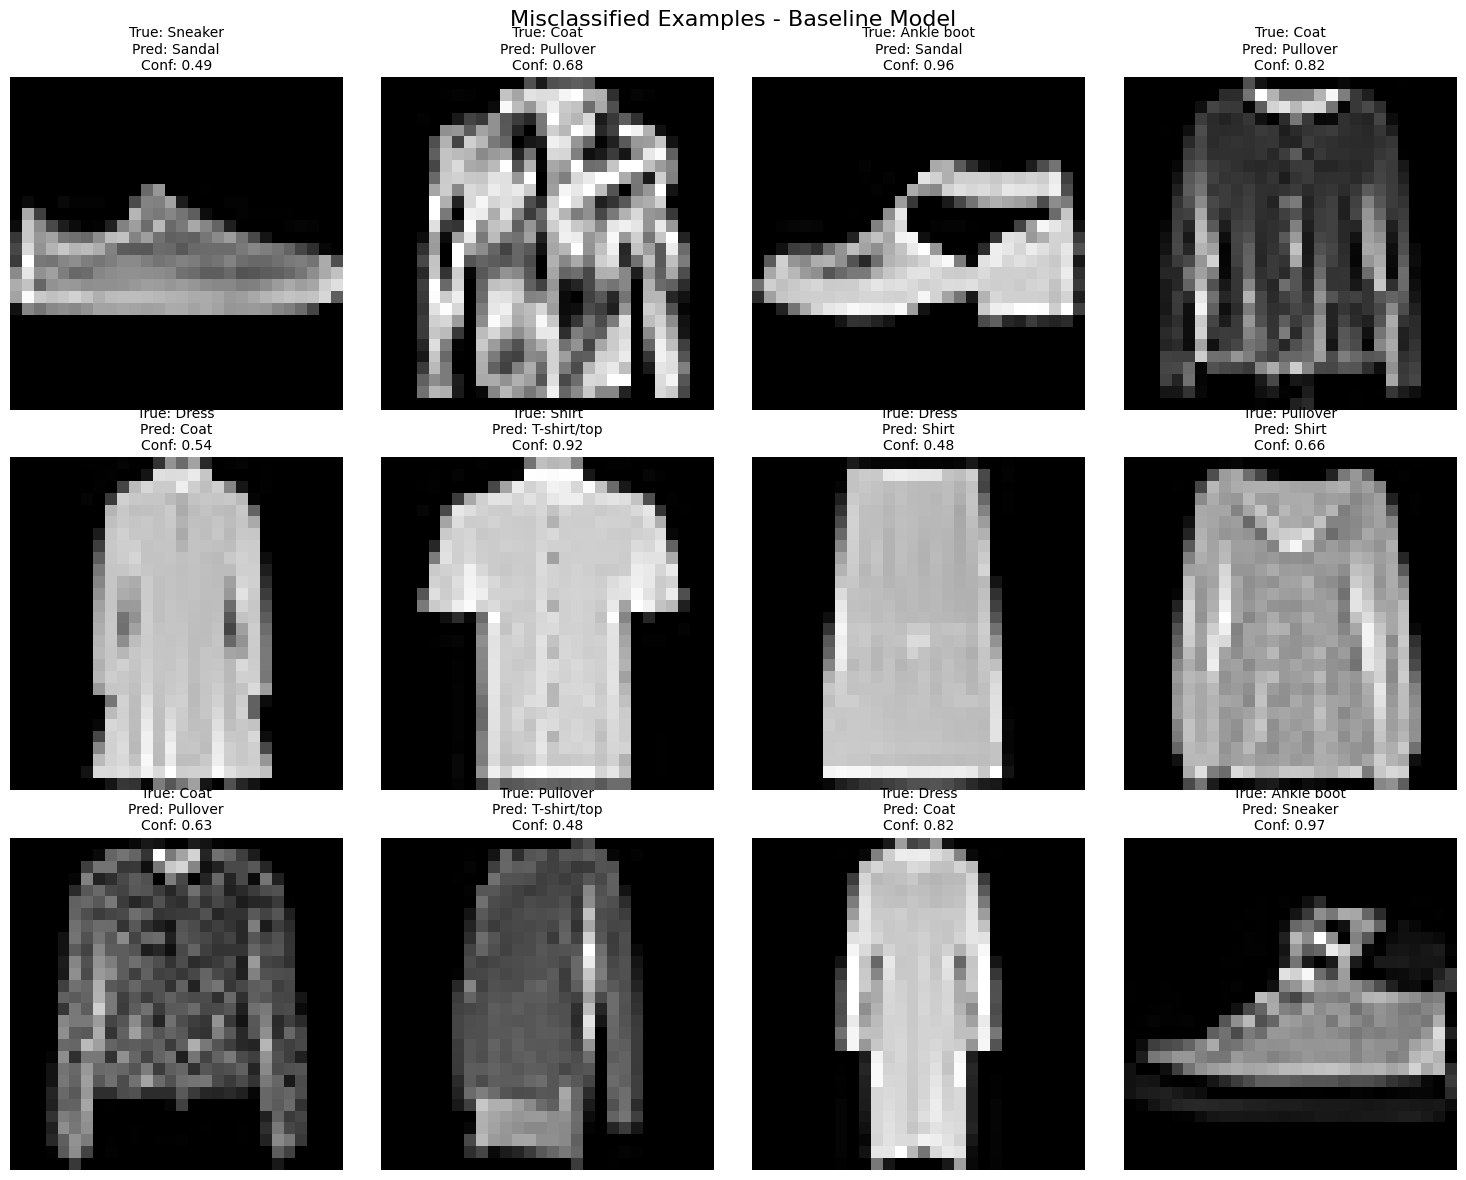


Total misclassifications: 1191
Average confidence on wrong predictions: 0.67


In [16]:
# Visualize Misclassified Examples
misclassified_indices = []
misclassified_images = []
misclassified_true = []
misclassified_pred = []
misclassified_conf = []

for i, (pred, true, probs) in enumerate(zip(all_preds, all_labels, all_probs)):
    if pred != true:
        misclassified_indices.append(i)
        misclassified_true.append(true)
        misclassified_pred.append(pred)
        misclassified_conf.append(np.max(probs))

# Get actual images for first 12 misclassifications
test_images = []
for images, labels in test_loader:
    test_images.extend(images)

# Plot
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.ravel()

for i in range(12):
    idx = misclassified_indices[i]
    img = test_images[idx].squeeze()
    true_label = class_names[misclassified_true[i]]
    pred_label = class_names[misclassified_pred[i]]
    confidence = misclassified_conf[i]
    
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}', 
                      fontsize=10)
    axes[i].axis('off')

plt.suptitle('Misclassified Examples - Baseline Model', fontsize=16)
plt.tight_layout()
plt.savefig('../results/misclassified_examples.png', dpi=300)
plt.show()

print(f"\nTotal misclassifications: {len(misclassified_indices)}")
print(f"Average confidence on wrong predictions: {np.mean(misclassified_conf):.2f}")